No notebook anterior, nós aprendemos intuitivamente como o perceptron aprende. De maneira geral, nós vamos atualizando os pesos e o bias sempre buscando diminuir uma função de custo. Nesse notebook, nós vamos ver como esse aprendizado realmente acontence, tanto na teoria quanto na prática. Também utilizaremos o Perceptron para resolver problemas de regressão, classificação e regressão logística.

__Objetivos__:

- Implementar o perceptron e seu modelo de aprendizado em python puro, Numpy, Keras e Tensorflow
- Utilizar o perceptron para regressão e classificação

# Sumário

# Imports e Configurações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

Using TensorFlow backend.


# Introdução

O tipo mais básico de Rede Neural Artificial é formada por apenas um neurônio, o __Perceptron__. O Perceptron nada mais é que um  classificador/regressor linear responsável por mapear uma ou mais entradas em uma saída desejada. Além disso, o método de aprendizagem do Perceptron é adaptativo, ou seja, os melhores parâmetros são aprendidos utilizando algum método de minimização conhecido. Em geral, esse método é o _Gradiente Descendente_, mas outros métodos de minimização podem ser utilizados.

O perceptron é formado por:

<img src='images/perceptron.png' width='350'>

- __entradas__ $x_1 ... x_D$: representam os atributos dos seus dados com dimensionalidade D. O Perceptron aceita qualquer tamanho de entrada, porém a saída é sempre apenas um valor.
- __junção aditiva__ $\sum$: também chamada de _função agregadora_, nada mais é que a soma ponderada das entradas com os __pesos__ ($w_1 ... w_D)$. Em geral, também é alimentada por um __bias__ $b$, responsável por deslocar o resultado do somatório. A junção aditiva é descrita pela seguinte fórmula:

$$\sum_i^D{w_ix_i} + b$$

- __função de ativação__ $f$: inicialmente, o perceptron foi projetado para utilizar a função de ativação linear, ou seja, o resultado da junção aditiva representava a saída do Perceptron.

Logo, o Perceptron é representado pela seguinte fórmula matemática:

$$y_{pred} = f(\sum_i^D{w_ix_i} + b)$$

Onde:

- $D$: representa a dimensionalidade das amostras, ou seja, a quantidade de atributos de cada amostra.
- $x$: representa os atributos dos nossos dados que servem de entrada para o Perceptron.
- $w$: representam os __pesos sinápticos__ que ponderam as entradas.
- $b$: representa o __bias__, responsável por deslocar a fronteira de decisão além da origem e não depende de nenhum valor de entrada. Repare que o bias encontra-se fora do somatório.
- $f$: função de ativação.
- $y_{pred}$: representa a saída do Perceptron (o valor predito).


## Como o Perceptron Aprende?

Se você já leu sobre o Perceptron antes, você provavelmente já viu que o modo como o perceptron aprende - isto é, a forma como os pesos são atualizados -, dá-se pela seguite fórmula:

$$w_i = w_i + \lambda(y_i - y_{pred})x_i$$

Onde $\lambda$ é a __taxa de aprendizagem__.

Mas você já imaginou da onde vem essa fórmula? Em primeiro lugar, o método de atulização dos pesos é baseado no __Gradiente Descendente__. Sendo $\overrightarrow{w} = \{w_1, w_2, ..., w_D\}$, a atualização dos pesos é dados por:

$$\overrightarrow{w} = \overrightarrow{w} + \Delta{\overrightarrow{w}}$$

em que:

$$\Delta{\overrightarrow{w}} = \lambda\nabla E(\overrightarrow{w})$$

Sendo $\nabla E(\overrightarrow{w})$ o gradiente de uma função que depende de $\overrightarrow{w}$ e que queremos minimizar.

Agora, imagine que estamos utilizando um Perceptron para regressão, cuja função de custo geralmente é:

$$J(w) = \frac{1}{2}\sum_{i}^N (y_i - y_{pred_i})^2$$

Onde $N$ é a quantidade de amostras nos dados, e as demais variáveis representam as mesmas vistas anteriormente. Repare que a função de custo é quase uma _Mean Squared Error (MSE)_, só que ao invés de dividir por $N$, está se dividindo por 2 o resultado do somatório. O por quê disso será entendido mais a frente na demonstração.

Queremos encontrar o vetor $\overrightarrow{w}$ que minimiza a função $J$. Assim, temos:

$$\frac{\partial J}{\partial w_i} = \frac{\partial}{\partial w_i}\frac{1}{2}\sum_i^N (y_i - y_{pred_i})^2$$

Como a derivada do somatório é igual ao somatório das derivadas:

$$= \frac{1}{2}\sum_i^N \frac{\partial}{\partial w_i}(y_i - y_{pred_i})^2$$

Aplicando a regra da cadeia:

$$= \sum_i^N (y_i - y_{pred_i})\frac{\partial}{\partial w_i}(y_i - y_{pred_i})$$

Repare que, quando derivamos $(y_i - y_{pred_i})^2$, o expoente 2, ao sair do somatório, foi multiplicado por $\frac{1}{2}$, tornando-o 1. Isso é o que os matemáticos denominam de "conveniência matemática". 

Como $y_{pred_i} = w_i*x_i + b$ é uma função que depende de $w$, e sua derivada em relação a $w_i$ é apenas $x_i$, temos que:

$$\frac{\partial J}{\partial w_i} = \sum_i^N (y_i - y_{pred_i})(-x_i)$$
$$\frac{\partial J}{\partial w_i} = -\sum_i^N (y_i - y_{pred_i})x_i$$

Na forma vetorizada, essa equação torna-se:

$$\frac{\partial J}{\partial \overrightarrow{w}} = -(\overrightarrow{y} - \overrightarrow{y}_{pred})\overrightarrow{x}$$

Como o gradiente nos dá a direção que a função cresce, e queremos minimizar a função, podemos remover o sinal de menos em frente ao resultado. Logo, chegamos que a atualização dos pesos pelo perceptron é dada por $w_i = w_i + \lambda(y_i - y_{pred})x_i$.

# Regressão 

In [2]:
df = pd.read_csv('data/medidas.csv')
print(df.shape)
df.head(10)

(100, 2)


,Altura,Peso
0,187,109.72
1,177,91.09
2,180,88.93
3,177,89.39
4,177,92.02
5,183,94.70
6,178,83.57
7,177,85.19
8,183,92.96
9,188,108.21


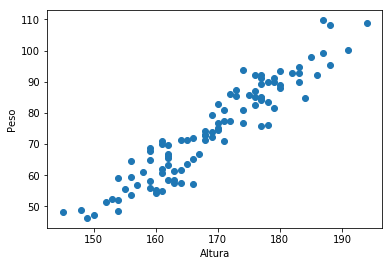

In [3]:
x = df.Altura.values
y = df.Peso.values

plt.figure()
plt.scatter(x, y)
plt.xlabel('Altura')
plt.ylabel('Peso')

In [4]:
print(x.shape, y.shape)

(100,) (100,)


In [5]:
x = x.reshape(-1, 1)

print(x.shape)

(100, 1)


## Python

__Exercício__: tentar estimar as learning_rates de __w__ e __b__. Elas são diferentes por que nossos dados não estão na mesma escala!

In [7]:
from random import random

D = x.shape[1]
w = 2*random() - 1 # [1, 1]
b = 2*random() - 1 # [1, 1]

for step in range(10001):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        y_pred = w*x_i + b
        error = y_i - y_pred
        w = w + 1e-7*error*x_i
        b = b + 1e-2*error
        sum_error += error
        
    if step%1000 == 0:
        print('step {0}: {1}'.format(step, sum_error))

print(w, b)

step 0: [ 8462.12241398]
step 1000: [-10.01354486]
step 2000: [-4.20213334]
step 3000: [-1.76340395]
step 4000: [-0.74000353]
step 5000: [-0.31053873]
step 6000: [-0.130316]
step 7000: [-0.05468645]
step 8000: [-0.02294889]
step 9000: [-0.00963039]
step 10000: [-0.00404134]
[ 1.36971049] [-157.86653818]


## Numpy 

In [8]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1 # [1, 1]
b = 2*np.random.random()-1       # [1, 1]

for step in range(10001):
    y_pred = np.dot(w, x.T) + b # [1,1]x[1,100] + [1,1] = [1,100]
    error = y - y_pred # [1,100] + [100] = [1,100]
    w = w + 1e-7*np.dot(error, x) # [1,1] + [1,100]x[100,1] = [1,1]
    b = b + 1e-2*np.sum(error)
    
    if step%1000 == 0:
        print('step {0}: {1:.5f}'.format(step, np.sum(error)))
    
print(w, b)

step 0: 8646.41061
step 1000: -8.19625
step 2000: -3.42231
step 3000: -1.42897
step 4000: -0.59666
step 5000: -0.24913
step 6000: -0.10402
step 7000: -0.04344
step 8000: -0.01814
step 9000: -0.00757
step 10000: -0.00316
[[ 1.37128186]] -157.435990579


### Numpy com Pré-processamento

In [9]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

In [11]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1 # [1, 1]
b = 2*np.random.random()-1       # [1, 1]

learning_rate = 1e-3

for step in range(5001):
    y_pred = np.dot(w, x.T) + b # [1,1]x[1,100] + [1,1] = [1,100]
    error = y - y_pred # [1,100] + [100] = [1,100]
    w = w + learning_rate*np.dot(error, x) # [1,1] + [1,100]x[100,1] = [1,1]
    b = b + learning_rate*np.sum(error)
    
    if step%1000 == 0:
        print('step {0}: {1:.5f}'.format(step, np.sum(error)))
    
print(w, b)

step 0: 7406.46836
step 1000: 0.00000
step 2000: 0.00000
step 3000: 0.00000
step 4000: 0.00000
step 5000: 0.00000
[[ 33.60164767]] 74.9963628698


## Keras 

In [12]:
D = x.shape[1]

model = Sequential()
model.add(Dense(units=1, activation='linear', input_shape=(D,)))
model.compile(loss='mse', optimizer='sgd')

In [13]:
model.fit(x, y, batch_size=x.shape[0], epochs=5000, verbose=0)
error = model.evaluate(x, y, batch_size=x.shape[0], verbose=0)
w, b = model.get_weights()
print(error)
print(w,b)

26.0829143524
[[ 33.60112]] [ 74.99616241]


## TensorFlow 

In [14]:
D = x.shape[1]

learning_rate = 1e-3
tf.reset_default_graph()

graph = tf.Graph()
with graph.as_default():
    tf_x = tf.constant(x, dtype=tf.float64)
    tf_y = tf.constant(y.reshape(1,-1), dtype=tf.float64)
    
    tf_w = tf.Variable(tf.random_uniform(shape=(1, D), minval=-1, maxval=1, dtype=tf.float64))
    tf_b = tf.Variable(tf.random_uniform(shape=(1,), minval=-1, maxval=1, dtype=tf.float64))
    
    y_pred = tf.add(tf.matmul(tf_w, tf_x, transpose_b=True), tf_b)
    error = tf.subtract(tf_y, y_pred)
    loss = tf.reduce_sum(error)
    
    delta = tf.matmul(error, tf_x)
    train_w = tf.assign(tf_w, tf.add(tf_w, learning_rate*delta))
    train_b = tf.assign(tf_b, tf.add(tf_b, learning_rate*loss))

In [15]:
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(5001):
        erro, _, _ = sess.run([loss, train_w, train_b])

        if step%1000 == 0:
            print('step {0}: {1}'.format(step, erro))
    
    print(error)
    print(tf_w.eval(), tf_b.eval())

step 0: 7331.634652468829
step 1000: 1.0986921239464209e-07
step 2000: 6.473044322774513e-12
step 3000: 6.473044322774513e-12
step 4000: 6.473044322774513e-12
step 5000: 6.473044322774513e-12
Tensor("Sub:0", shape=(1, 100), dtype=float64)
[[ 33.60164767]] [ 74.99636287]


## Exercícios

In [2]:
df = pd.read_csv('data/notas.csv')

print(df.shape)
df.head(10)

(25, 4)


,prova1,prova2,prova3,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


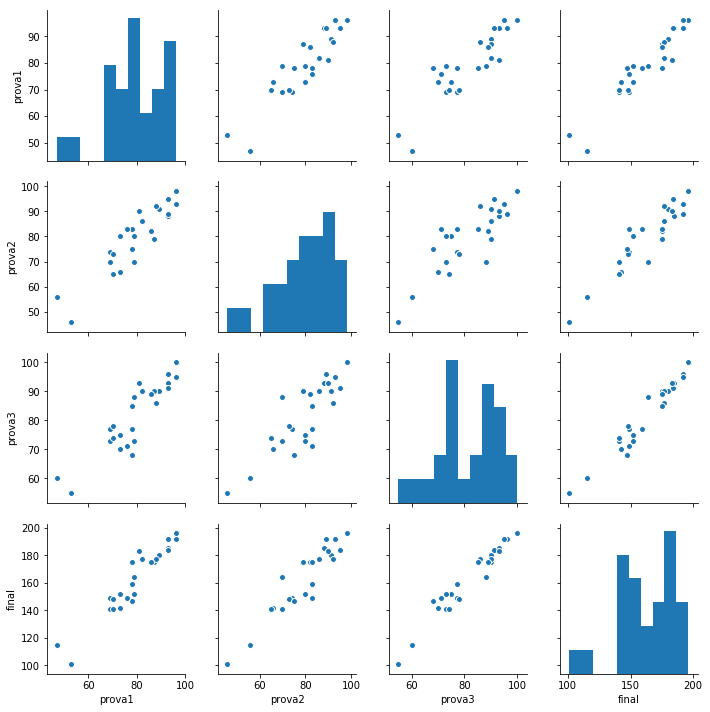

In [17]:
sb.pairplot(df)

In [3]:
x = df[['prova1', 'prova2', 'prova3']].values
y = df['final'].values

print(x.shape, y.shape)

(25, 3) (25,)


In [4]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

In [20]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x,y)

print("w: {} \nb: {}".format(reg.coef_, reg.intercept_))

w: [  8.72048636  14.1054877   26.26749487] 
b: 150.65175754349872


### Python

In [21]:
from random import random

D = x.shape[1]
w = [2*random() - 1 for i in range(D)] # [1, D]
b = 2*random() - 1 # [1, 1]

learning_rate = 1e-2

for step in range(5001):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        y_pred = sum([w[d]*x_i[d] for d in range(D)]) + b
        error = y_i - y_pred
        w = [w[d] + learning_rate*error*x_i[d] for d in range(D)]
        b = b + learning_rate*error
        sum_error += error
        
    if step%1000 == 0:
        print('step {0}: {1}'.format(step, sum_error))

print(w, b, sep='\n')

step 0: 3524.737595887462
step 1000: 0.0021379131795526973
step 2000: 1.1228964936549346e-05
step 3000: 6.574786937108001e-08
step 4000: 3.8552627756871516e-10
step 5000: 3.993250174971763e-12
[8.7247829333128752, 14.139755265029969, 26.320668665316504]
150.711215414


### Numpy

In [23]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1
b = 2*np.random.random()-1       

learning_rate = 1e-2

for step in range(10001):
    y_pred = np.dot(w, x.T) + b 
    error = y - y_pred
    w = w + learning_rate*np.dot(error, x)
    b = b + learning_rate*np.sum(error)
    
    if step%1000 == 0:
        print('step {0}: {1}'.format(step, np.sum(error)))
    
print(w, b)

step 0: 4023.233514069615
step 1000: 0.0023540286535990163
step 2000: 1.2977940158975798e-05
step 3000: 7.885337538482418e-08
step 4000: 4.795595032192068e-10
step 5000: 4.177991286269389e-12
step 6000: 1.3926637620897964e-12
step 7000: 1.1084466677857563e-12
step 8000: 1.1084466677857563e-12
step 9000: 1.1084466677857563e-12
step 10000: 1.1084466677857563e-12
[[  8.72048636  14.1054877   26.26749487]] 150.651757543


### Keras

In [5]:
D = x.shape[1]

model2 = Sequential()
model2.add(Dense(units=1, activation='linear', input_shape=(D,)))
model2.compile(loss='mse', optimizer='sgd')

In [6]:
model2.fit(x, y, batch_size=x.shape[0], epochs=5000, verbose=0)
error = model2.evaluate(x, y, batch_size=x.shape[0], verbose=0)
w, b = model2.get_weights()
print(error)
print(w,b)

5.81983089447
[[ 10.2660656 ]
 [ 13.56921387]
 [ 25.25815964]] [ 150.50473022]


### Tensorflow

In [7]:
D = x.shape[1]

learning_rate = 1e-3
tf.reset_default_graph()

graph = tf.Graph()
with graph.as_default():
    tf_x = tf.constant(x, dtype=tf.float64)
    tf_y = tf.constant(y.reshape(1,-1), dtype=tf.float64)
    
    tf_w = tf.Variable(tf.random_uniform(shape=(1, D), minval=-1, maxval=1, dtype=tf.float64))
    tf_b = tf.Variable(tf.random_uniform(shape=(1,), minval=-1, maxval=1, dtype=tf.float64))
    
    y_pred = tf.add(tf.matmul(tf_w, tf_x, transpose_b=True), tf_b)
    error = tf.subtract(tf_y, y_pred)
    loss = tf.reduce_sum(error)
    
    delta = tf.matmul(error, tf_x)
    train_w = tf.assign(tf_w, tf.add(tf_w, learning_rate*delta))
    train_b = tf.assign(tf_b, tf.add(tf_b, learning_rate*loss))

In [8]:
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        erro, _, _ = sess.run([loss, train_w, train_b])

        if step%1000 == 0:
            print('step {0}: {1}'.format(step, erro))
    
    print(error)
    print(tf_w.eval(), tf_b.eval())

step 0: 4075.5791991891356
step 1000: 1.1724391511163788
step 2000: 0.5048778418937445
step 3000: 0.22510817519606974
step 4000: 0.10432016895147456
step 5000: 0.050451087230229064
step 6000: 0.02547962341598975
step 7000: 0.013399222738513572
step 8000: 0.00729633699263843
step 9000: 0.004086082757339682
step 10000: 0.002337596253681795
Tensor("Sub:0", shape=(1, 25), dtype=float64)
[[  8.79530227  14.05893434  26.23732779]] [ 150.64736838]


# Classificação

Para transformar o Perceptron em um classificador binário, temos que fazer uma pequena modificação no cálculo da saída:

$$y_{pred} = \begin{cases}1 & se \ wx+b > 0\\0 & caso \ contrário\end{cases}$$

Apesar dessa modificação, __a fórmula de atualização dos pesos não sofre nenhuma alteração__. 

Vamos, então, implementar nosso perceptron para classificação em Python, Numpy, Keras e TensorFlow:

In [2]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
#y = np.array([0, 1, 1, 0]) # porta OR
y = np.array([0, 0, 0, 1]) # porta AND

print(x.shape, y.shape)

(4, 2) (4,)


## Python

In [10]:
from random import random

D = x.shape[1]
w = [2*random() - 1 for i in range(D)] # [1, D]
b = 2*random() - 1 # [1, 1]

learning_rate = 1e-2

for step in range(101):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        y_pred = sum([w[d]*x_i[d] for d in range(D)]) + b
        y_pred = 1 if y_pred > 0 else 0
        error = y_i - y_pred
        w = [w[d] + learning_rate*error*x_i[d] for d in range(D)]
        b = b + learning_rate*error
        sum_error += error
        
    if step%10 == 0:
        print('step {0}: {1}'.format(step, sum_error))

print('w: {} \nb: {}'.format(w, b))
print('y_pred: {0}'.format(np.dot(w, x.T)+b))

step 0: 1
step 10: 1
step 20: 1
step 30: 1
step 40: 1
step 50: 1
step 60: 0
step 70: 0
step 80: 0
step 90: 0
step 100: 0
w: [0.020484274559200502, 0.1096919557819804] 
b: -0.12682377681592905
y_pred: [-0.12682378 -0.01713182 -0.1063395   0.00335245]


## Numpy

In [11]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1
b = 2*np.random.random()-1       

learning_rate = 1e-2

for step in range(100):
    y_pred = np.dot(w, x.T) + b 
    y_pred = np.where(y_pred > 0, 1, 0)
    error = y - y_pred
    w = w + learning_rate*np.dot(error, x)
    b = b + learning_rate*np.sum(error)
    
    if step%10 == 0:
        print('step {0}: {1}'.format(step, np.sum(error)))
    
print('w: {} \nb: {}'.format(w, b))
print('y_pred: {0}'.format(np.dot(w, x.T)+b))

step 0: -1
step 10: -1
step 20: 0
step 30: 0
step 40: 0
step 50: 0
step 60: 0
step 70: 0
step 80: 0
step 90: 0
w: [[ 0.27357792  0.05777939]] 
b: -0.28444403143263974
y_pred: [[-0.28444403 -0.22666464 -0.01086611  0.04691328]]


## Keras

In [3]:
D = x.shape[1]

model3 = Sequential()
model3.add(Dense(units=1, activation='linear', input_dim=D))
model3.compile(loss='binary_crossentropy', optimizer='sgd')

In [4]:
model3.fit(x, y, epochs=1000, verbose=0)
y_pred = model3.predict(x, verbose=0)
w, b = model3.get_weights()
print(w,b)
print(y_pred)

[[ 1.00194025]
 [ 1.00259256]] [-1.00266421]
[[ -1.00266421e+00]
 [ -7.16447830e-05]
 [ -7.23958015e-04]
 [  1.00186861e+00]]


## TensorFlow

In [5]:
D = x.shape[1]

learning_rate = 1e-2

tf.reset_default_graph()

graph = tf.Graph()
with graph.as_default():
    tf_x = tf.constant(x, dtype=tf.float64)
    tf_y = tf.constant(y.reshape(1,-1), dtype=tf.float64)
    
    tf_w = tf.Variable(tf.random_uniform(shape=(1, D), minval=-1, maxval=1, dtype=tf.float64))
    tf_b = tf.Variable(tf.random_uniform(shape=(1,), minval=-1, maxval=1, dtype=tf.float64))
    
    y_pred = tf.add(tf.matmul(tf_w, tf_x, transpose_b=True), tf_b)
    y_pred_bin = tf.where(y_pred > 0, tf.ones_like(y_pred), tf.zeros_like(y_pred))
    error = tf.subtract(tf_y, y_pred_bin)
    
    loss = tf.reduce_sum(error)
    
    delta = tf.matmul(error, tf_x)
    train_w = tf.assign(tf_w, tf.add(tf_w, learning_rate*delta))
    train_b = tf.assign(tf_b, tf.add(tf_b, learning_rate*loss))

In [6]:
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(101):
        erro, _, _ = sess.run([loss, train_w, train_b])
        
        if step%10 == 0:
            print('step {0}: {1}'.format(step, erro))
    
    print(erro)
    print(tf_w.eval(), tf_b.eval())
    print(y_pred_bin.eval())

step 0: -1.0
step 10: -1.0
step 20: 0.0
step 30: 0.0
step 40: -1.0
step 50: -2.0
step 60: 0.0
step 70: 0.0
step 80: 0.0
step 90: 0.0
step 100: 0.0
0.0
[[ 0.02581382  0.02654033]] [-0.0348813]
[[ 0.  0.  0.  1.]]
